# Handling Outliers

## 1. Zscore-

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('data/placement.csv')
df.shape

(1000, 3)

In [7]:
df.sample(5)

,cgpa,placement_exam_marks,placed
999,4.90,10.0,1
454,7.13,53.0,0
74,6.16,3.0,1
721,6.98,11.0,0
751,6.69,20.0,1


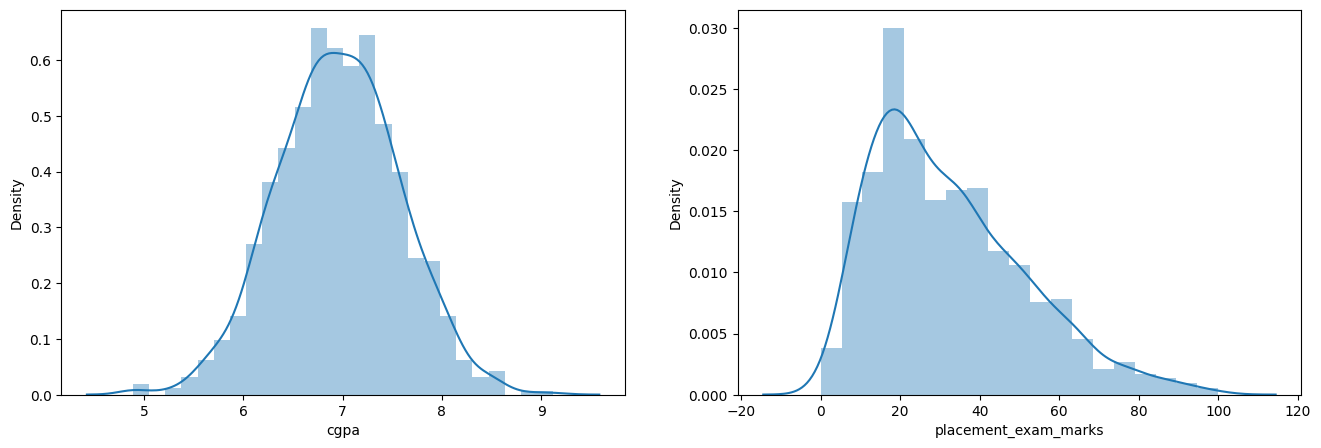

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [9]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [10]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [11]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [12]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [13]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [14]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [15]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()
lower_limit

5.113546374602832

In [16]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)
df.shape

(1000, 4)

<AxesSubplot:xlabel='cgpa', ylabel='Density'>

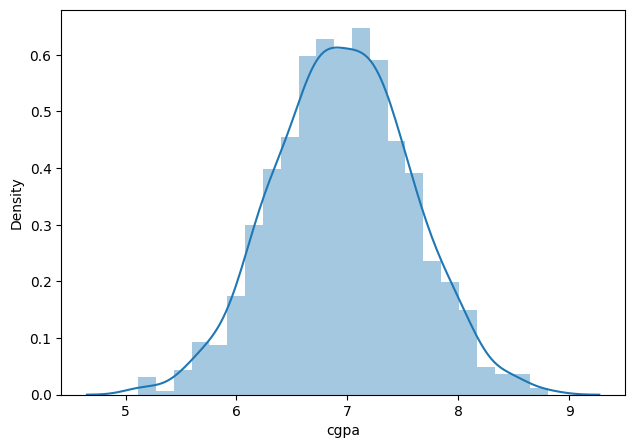

In [18]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

## 2. IQR-

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


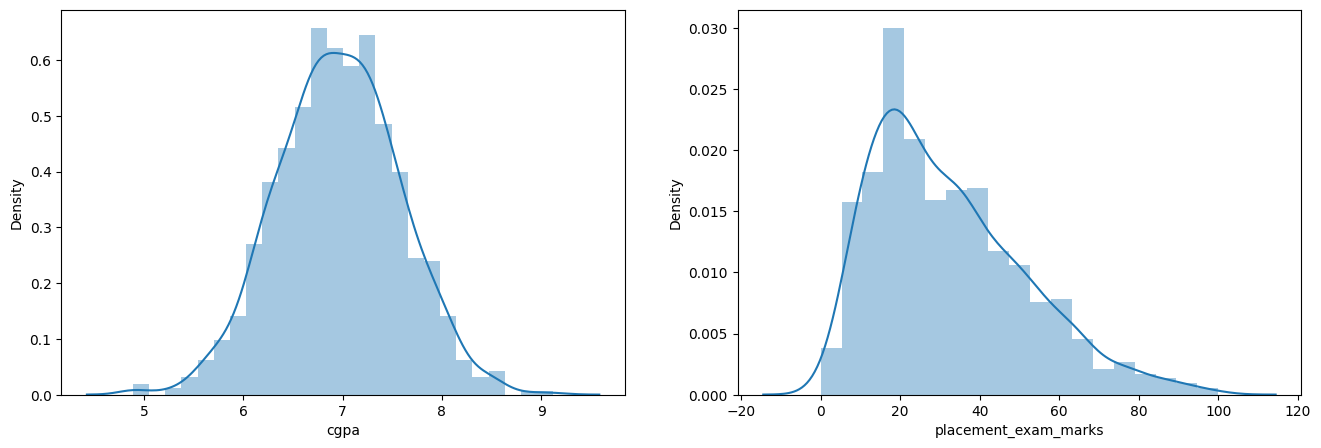

In [21]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [22]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot:>

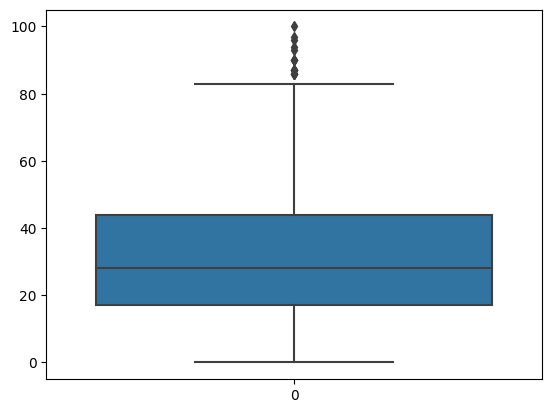

In [26]:
sns.boxplot(df['placement_exam_marks'])

In [28]:
#  Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [29]:
percentile75

44.0

In [30]:
iqr = percentile75 - percentile25
iqr

27.0

In [31]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


In [32]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [34]:
#  trimming
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df.shape

(985, 3)

In [35]:
# capping
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

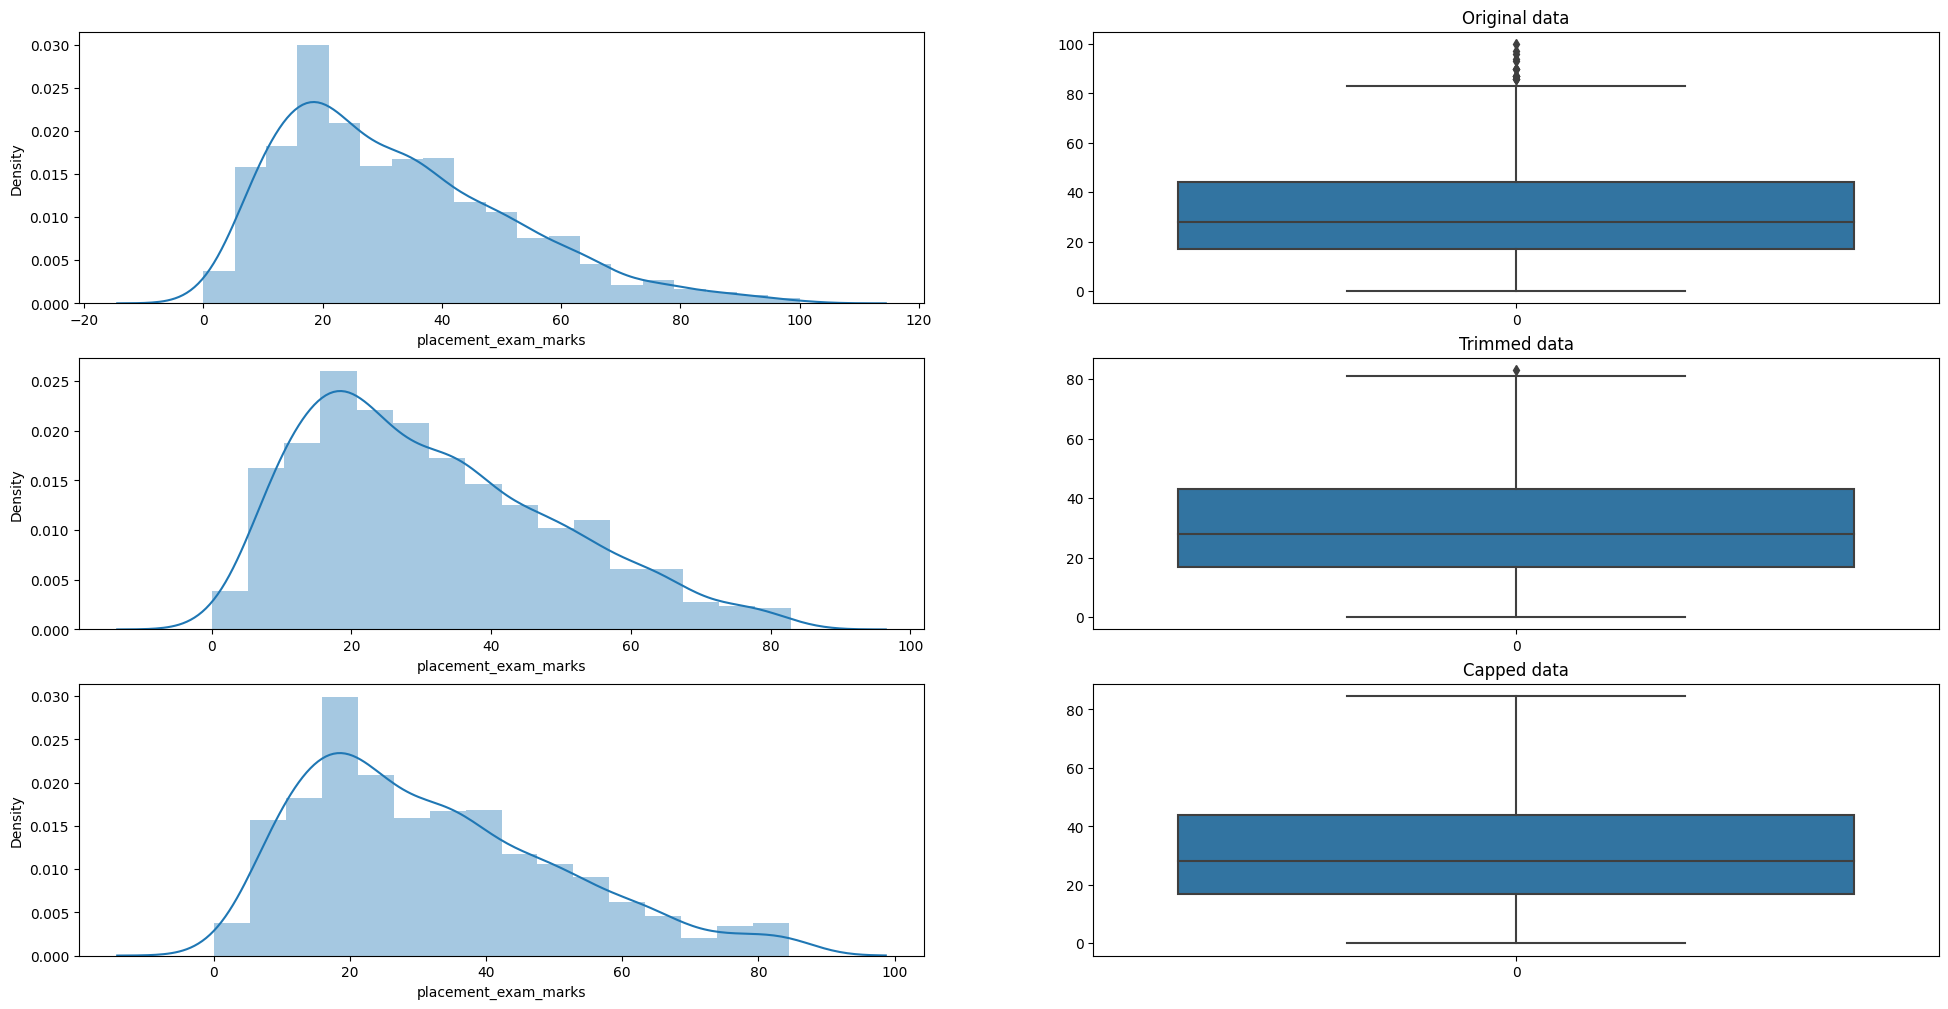

In [42]:
# vissuals
# Comparing

plt.figure(figsize=(24,12))

plt.subplot(3,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(3,2,2)
sns.boxplot(df['placement_exam_marks'])
plt.title('Original data')


plt.subplot(3,2,3)
sns.distplot(new_df['placement_exam_marks'])
plt.subplot(3,2,4)
sns.boxplot(new_df['placement_exam_marks'])
plt.title('Trimmed data')

plt.subplot(3,2,5)
sns.distplot(new_df_cap['placement_exam_marks'])
plt.subplot(3,2,6)
sns.boxplot(new_df_cap['placement_exam_marks'])
plt.title('Capped data')

plt.show()

## 3. Percentile Method-

In [44]:
import numpy as np
import pandas as pd
df = pd.read_csv('data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [46]:
df.shape

(10000, 3)

In [47]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

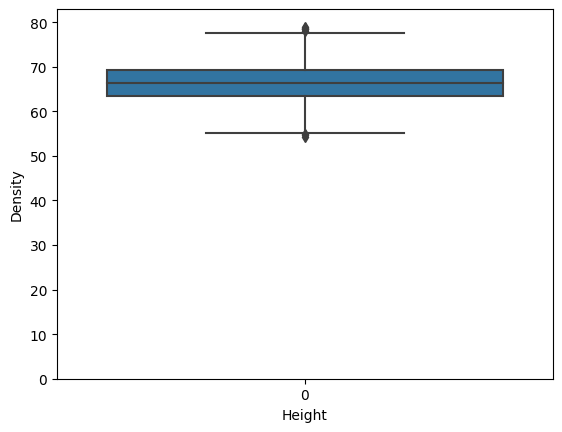

In [49]:
import seaborn as sns
sns.distplot(df['Height'])

<AxesSubplot:>

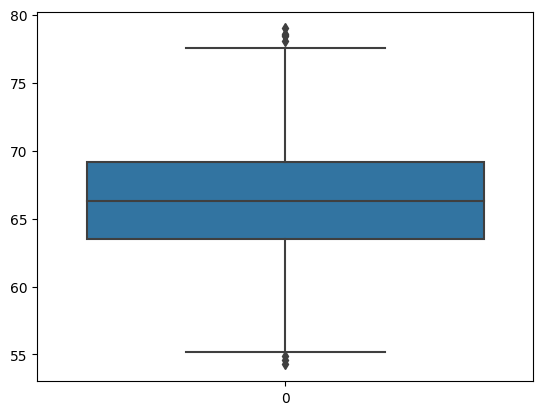

In [50]:
sns.boxplot(df['Height'])


In [51]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [52]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [56]:
## trimming
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [57]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [58]:
#  capping
# Capping --> Winsorization
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))
df.shape

(10000, 3)

# Feature Construction & Splitting

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

import seaborn as sns

df = pd.read_csv('data/titanic-dataset/train.csv')[['Age','Pclass','SibSp','Parch','Survived']]
df.head()

,Age,Pclass,SibSp,Parch,Survived
0,22.0,3,1,0,0
1,38.0,1,1,0,1
2,26.0,3,0,0,1
3,35.0,1,1,0,1
4,35.0,3,0,0,0


In [3]:
df.dropna(inplace=True)
df.head()

,Age,Pclass,SibSp,Parch,Survived
0,22.0,3,1,0,0
1,38.0,1,1,0,1
2,26.0,3,0,0,1
3,35.0,1,1,0,1
4,35.0,3,0,0,0


In [4]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]
X.head()

,Age,Pclass,SibSp,Parch
0,22.0,3,1,0
1,38.0,1,1,0
2,26.0,3,0,0
3,35.0,1,1,0
4,35.0,3,0,0


In [5]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=20))

0.6933333333333332

### i. Feature selecetion

In [6]:
X['Family_size'] = X['SibSp'] + X['Parch'] + 1
X.head()

,Age,Pclass,SibSp,Parch,Family_size
0,22.0,3,1,0,2
1,38.0,1,1,0,2
2,26.0,3,0,0,1
3,35.0,1,1,0,2
4,35.0,3,0,0,1


In [7]:
def myfunc(num):
    if num == 1:
        #alone
        return 0
    elif num >1 and num <=4:
        # small family
        return 1
    else:
        # large family
        return 2
myfunc(4)

1

In [8]:
X['Family_type'] = X['Family_size'].apply(myfunc)
X.head()

,Age,Pclass,SibSp,Parch,Family_size,Family_type
0,22.0,3,1,0,2,1
1,38.0,1,1,0,2,1
2,26.0,3,0,0,1,0
3,35.0,1,1,0,2,1
4,35.0,3,0,0,1,0


In [9]:
X.drop(columns=['SibSp','Parch','Family_size'],inplace=True)
X.head()

,Age,Pclass,Family_type
0,22.0,3,1
1,38.0,1,1
2,26.0,3,0
3,35.0,1,1
4,35.0,3,0


In [10]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=20))

0.7003174603174602

### ii. Feature splitting

In [12]:
df = pd.read_csv('data/titanic-dataset/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [14]:
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: 0, Length: 891, dtype: object

In [15]:
df[['Title','Name']]

,Title,Name
0,Mr,"Braund, Mr. Owen Harris"
1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,Miss,"Heikkinen, Miss. Laina"
3,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,Mr,"Allen, Mr. William Henry"
...,...,...
886,Rev,"Montvila, Rev. Juozas"
887,Miss,"Graham, Miss. Margaret Edith"
888,Miss,"Johnston, Miss. Catherine Helen ""Carrie"""
889,Mr,"Behr, Mr. Karl Howell"


In [16]:
(df.groupby('Title').mean()['Survived']).sort_values(ascending=False)

Title
the Countess    1.000000
Mlle            1.000000
Sir             1.000000
Ms              1.000000
Lady            1.000000
Mme             1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Col             0.500000
Major           0.500000
Dr              0.428571
Mr              0.156673
Jonkheer        0.000000
Rev             0.000000
Don             0.000000
Capt            0.000000
Name: Survived, dtype: float64

In [17]:
df['Is_Married'] = 0
df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1

c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
df['Is_Married']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Is_Married, Length: 891, dtype: int64